# Exploratory Data Analysis (EDA)

EDA on the credit risk alternative data transactions dataset. The notebook covers dataset overview, summaries, distributions, correlations, missing data, and outlier checks.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
sns.set_theme(style="whitegrid")

data_path = Path("../data/raw/data.csv").resolve()
print(f"Data path: {data_path}")


Data path: C:\Users\HomePC\Desktop\Fifth\Credit-Risk-Probability-Model-for-Alternative-Data\data\raw\data.csv


In [2]:
# Load data
initial_df = pd.read_csv(data_path)

# Inspect raw dtypes before cleaning
initial_dtypes = initial_df.dtypes

# Basic type fixes
clean_df = initial_df.copy()
clean_df["TransactionStartTime"] = pd.to_datetime(clean_df["TransactionStartTime"], errors="coerce")

# Numeric columns that should be numeric
numeric_cols = ["Amount", "Value", "PricingStrategy", "FraudResult"]
for col in numeric_cols:
    clean_df[col] = pd.to_numeric(clean_df[col], errors="coerce")

# Cast high-cardinality identifiers to category to surface categorical behaviour
categorical_cols = [
    "TransactionId",
    "BatchId",
    "AccountId",
    "SubscriptionId",
    "CustomerId",
    "CurrencyCode",
    "CountryCode",
    "ProviderId",
    "ProductId",
    "ProductCategory",
    "ChannelId",
]
for col in categorical_cols:
    clean_df[col] = clean_df[col].astype("category")

print("Initial dtypes (raw):\n", initial_dtypes)
print("\nCleaned dtypes:\n", clean_df.dtypes)


Initial dtypes (raw):
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Cleaned dtypes:
 TransactionId                      category
BatchId                            category
AccountId                          category
SubscriptionId                     category
CustomerId                         category
CurrencyCode                       category
CountryCode                        category
ProviderId                         category
ProductId                          category
ProductCategory                    ca

In [3]:
# Overview: first rows and shape
clean_df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [4]:
# Number of rows and columns
clean_df.shape


(95662, 16)

In [5]:
# Data types and non-null counts
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  category           
 1   BatchId               95662 non-null  category           
 2   AccountId             95662 non-null  category           
 3   SubscriptionId        95662 non-null  category           
 4   CustomerId            95662 non-null  category           
 5   CurrencyCode          95662 non-null  category           
 6   CountryCode           95662 non-null  category           
 7   ProviderId            95662 non-null  category           
 8   ProductId             95662 non-null  category           
 9   ProductCategory       95662 non-null  category           
 10  ChannelId             95662 non-null  category           
 11  Amount                95662 non-null  float64            
 12  Valu

In [6]:
# Summary statistics
num_summary = clean_df.select_dtypes(include=[np.number]).describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T
cat_summary = clean_df.select_dtypes(include=["category"]).describe().T

print("Numerical summary:")
display(num_summary)
print("\nCategorical summary (count, unique, top, freq):")
display(cat_summary)


Numerical summary:


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-30000.0,-5000.0,-50.0,1000.0,2800.0,14500.0,80000.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,10.0,25.0,275.0,1000.0,5000.0,25000.0,90000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,1.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



Categorical summary (count, unique, top, freq):


,count,unique,top,freq
TransactionId,95662,95662,TransactionId_99999,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
CountryCode,95662,1,256,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405


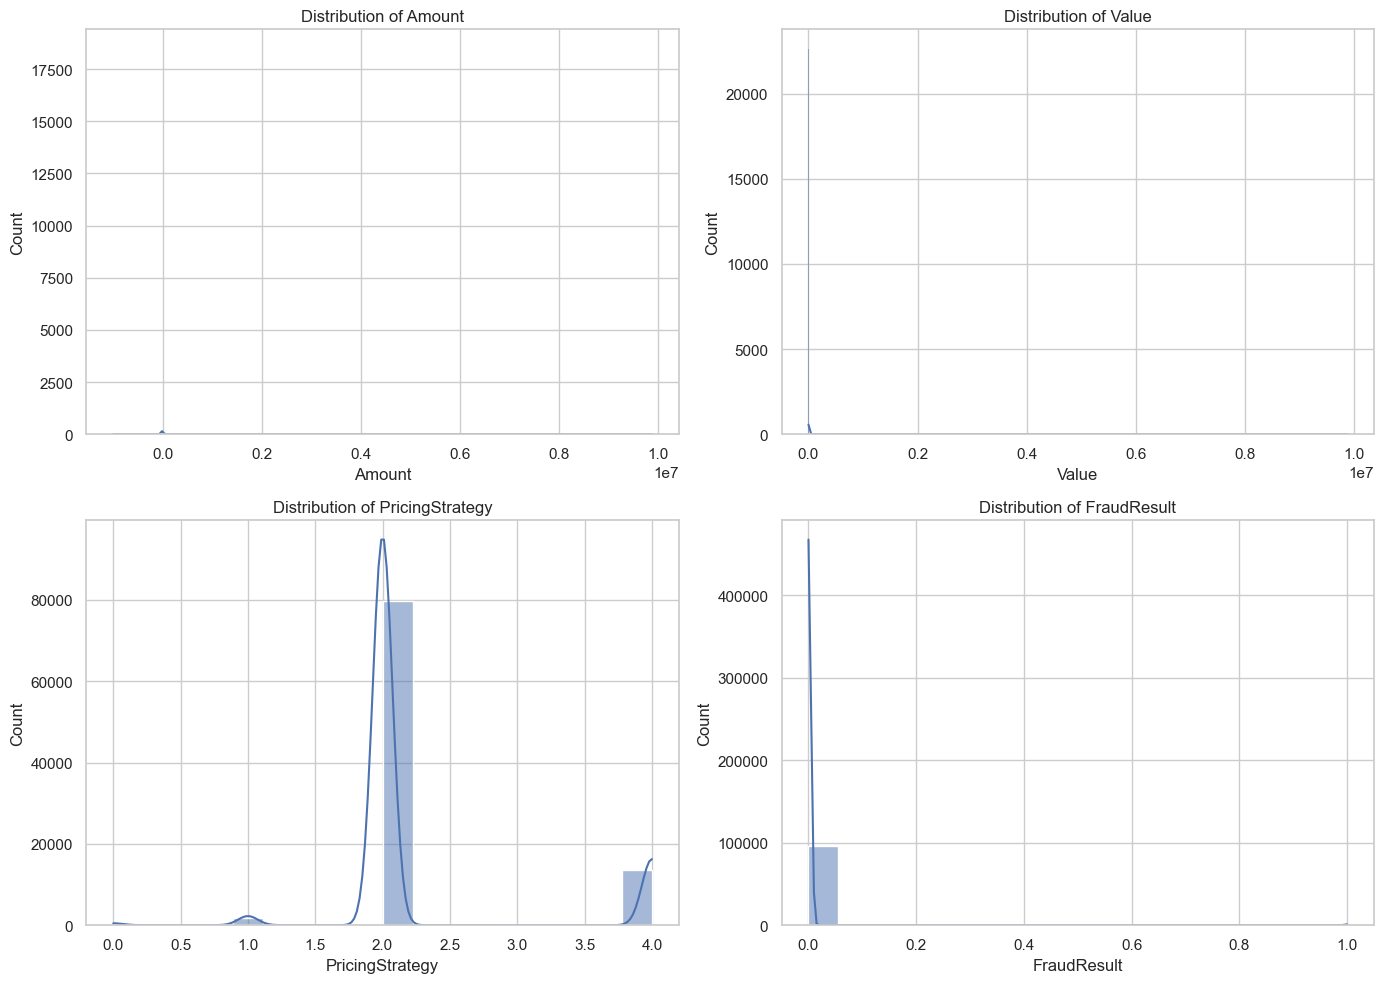

Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

In [7]:
# Distribution of numerical features
num_features = ["Amount", "Value", "PricingStrategy", "FraudResult"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for ax, col in zip(axes, num_features):
    sns.histplot(clean_df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Quick skewness check
clean_df[num_features].skew(numeric_only=True)


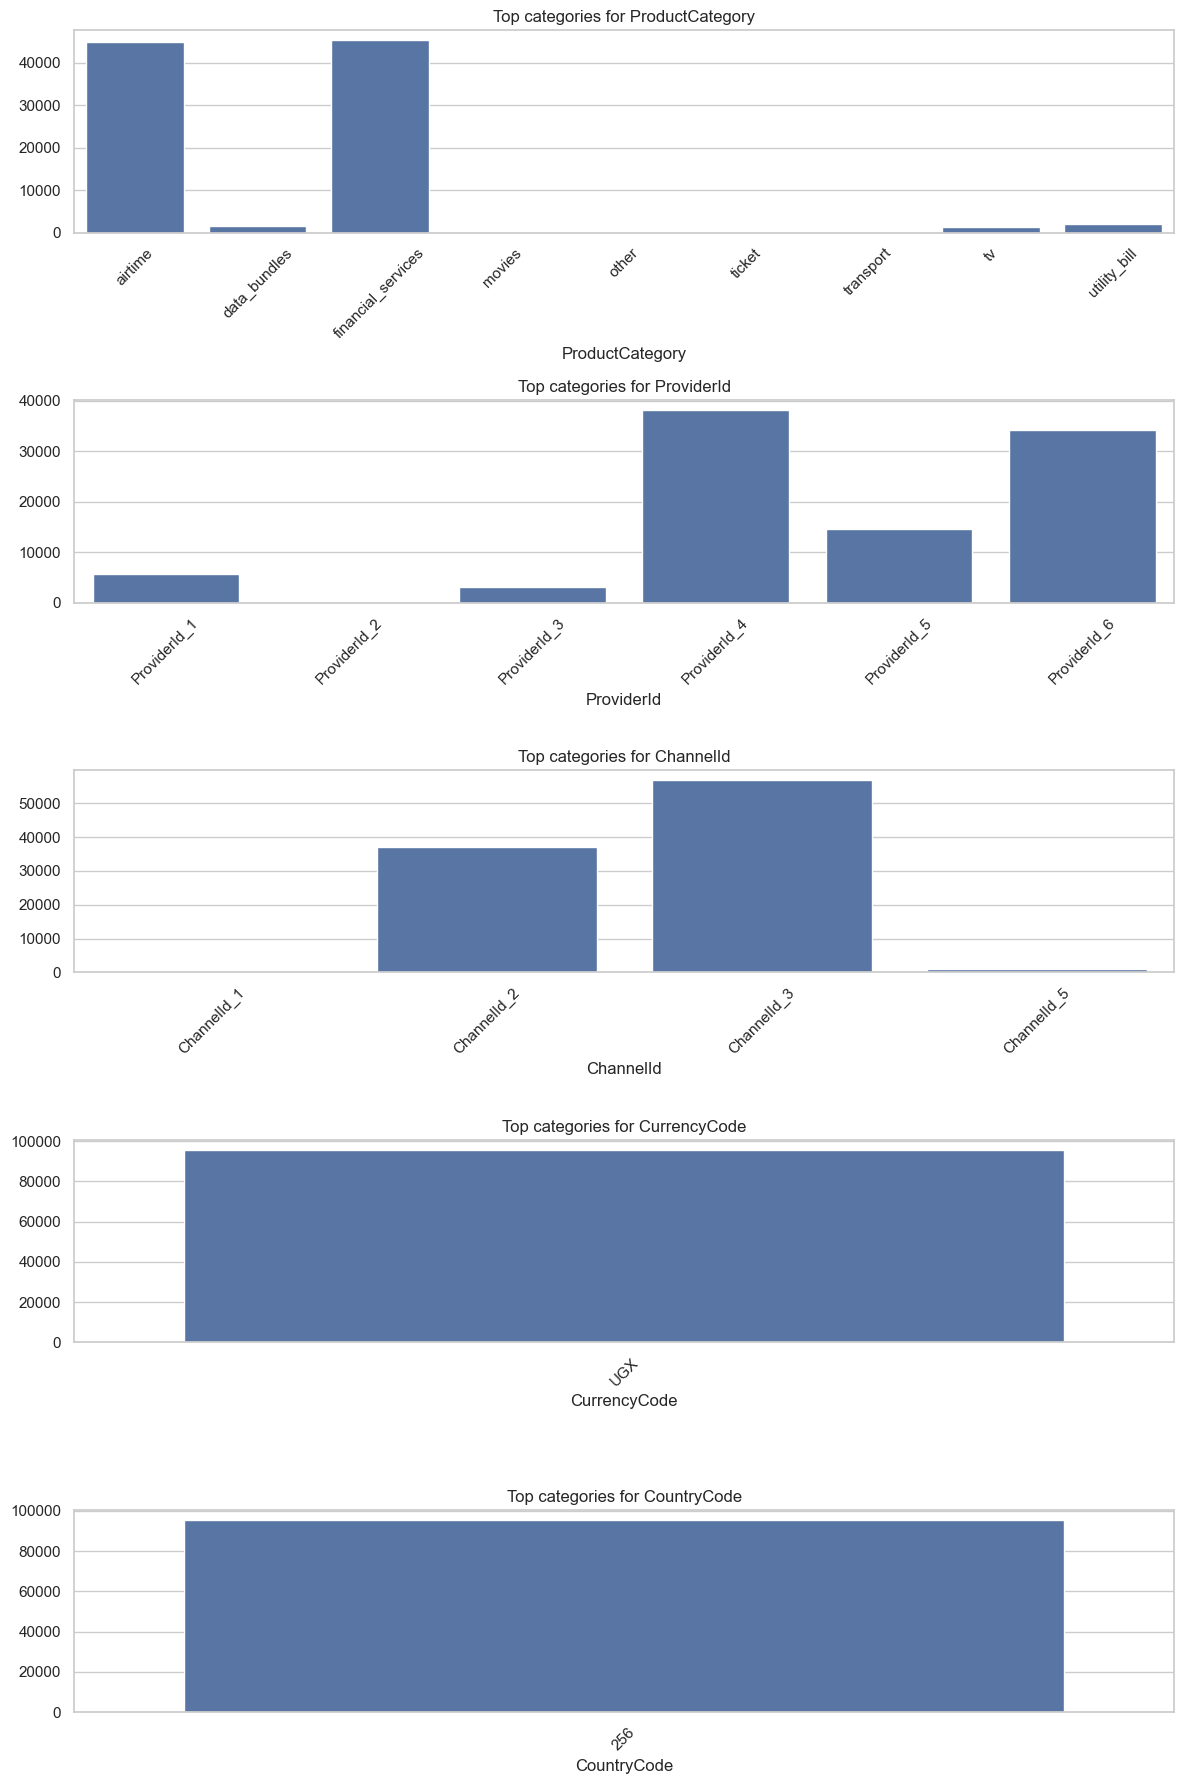

{'ProductCategory': ProductCategory
 financial_services    45405
 airtime               45027
 utility_bill           1920
 data_bundles           1613
 tv                     1279
 ticket                  216
 movies                  175
 transport                25
 other                     2
 Name: count, dtype: int64,
 'ProviderId': ProviderId
 ProviderId_4    38189
 ProviderId_6    34186
 ProviderId_5    14542
 ProviderId_1     5643
 ProviderId_3     3084
 ProviderId_2       18
 Name: count, dtype: int64,
 'ChannelId': ChannelId
 ChannelId_3    56935
 ChannelId_2    37141
 ChannelId_5     1048
 ChannelId_1      538
 Name: count, dtype: int64,
 'CurrencyCode': CurrencyCode
 UGX    95662
 Name: count, dtype: int64,
 'CountryCode': CountryCode
 256    95662
 Name: count, dtype: int64}

In [8]:
# Distribution of categorical features (top categories)
cat_features = ["ProductCategory", "ProviderId", "ChannelId", "CurrencyCode", "CountryCode"]
fig, axes = plt.subplots(len(cat_features), 1, figsize=(12, 18))
for ax, col in zip(axes, cat_features):
    counts = clean_df[col].value_counts().head(10)
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(f"Top categories for {col}")
    ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

# Full frequency tables for reference
cat_freq_tables = {col: clean_df[col].value_counts() for col in cat_features}
cat_freq_tables


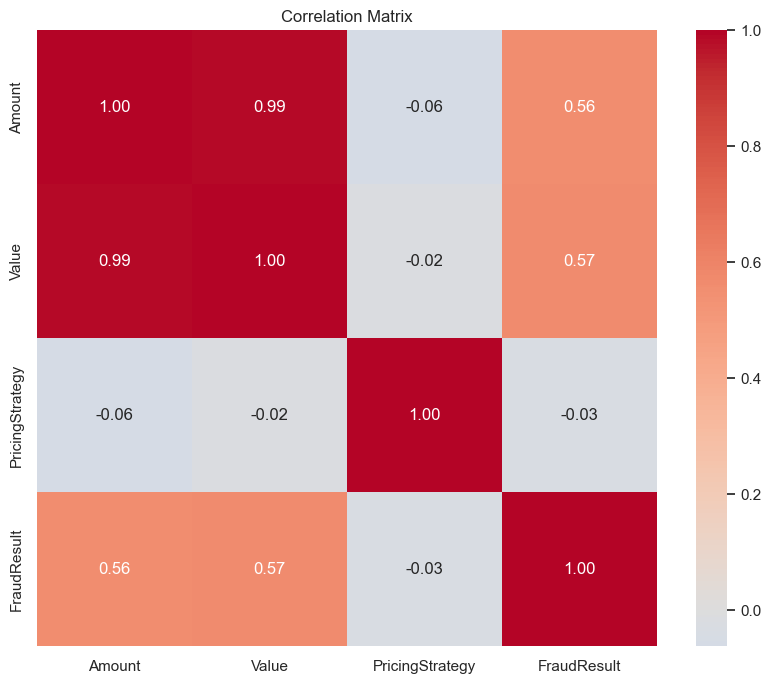

,Amount,Value,PricingStrategy,FraudResult
Amount,1.000000,0.989692,-0.061931,0.557370
Value,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.557370,0.566739,-0.033821,1.000000


In [9]:
# Correlation analysis on numeric columns
num_df = clean_df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

corr_matrix


In [10]:
# Missing value analysis
missing_counts = clean_df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(clean_df) * 100).round(2)

missing_df = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})
missing_df


,missing_count,missing_pct
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


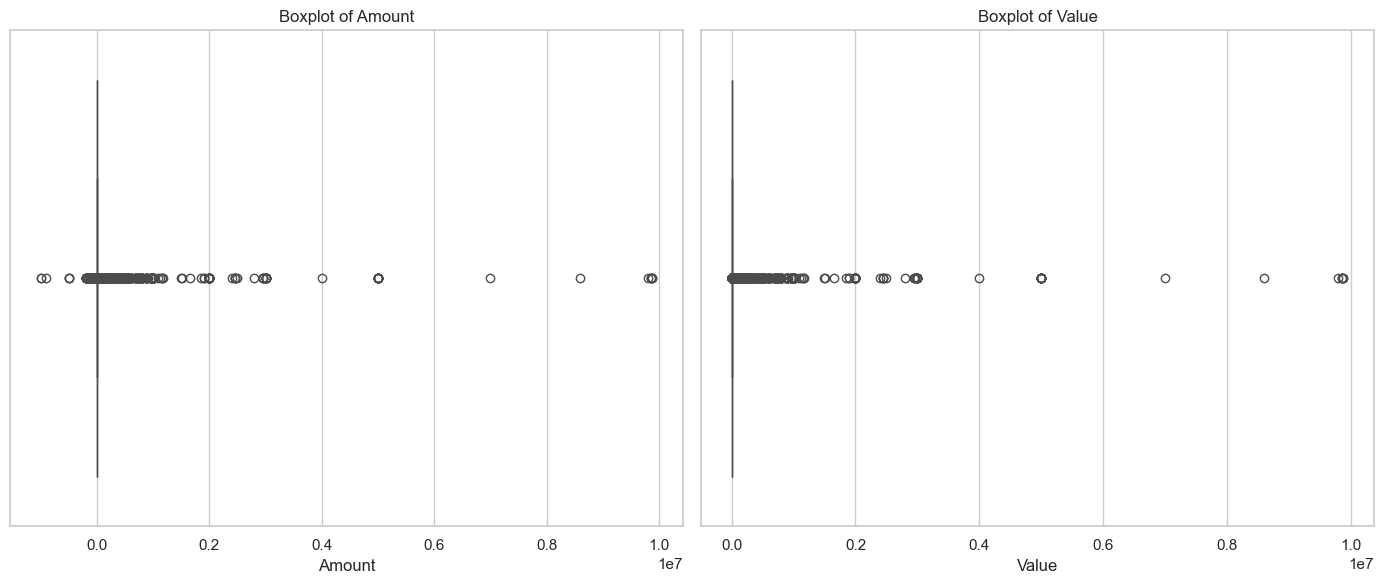

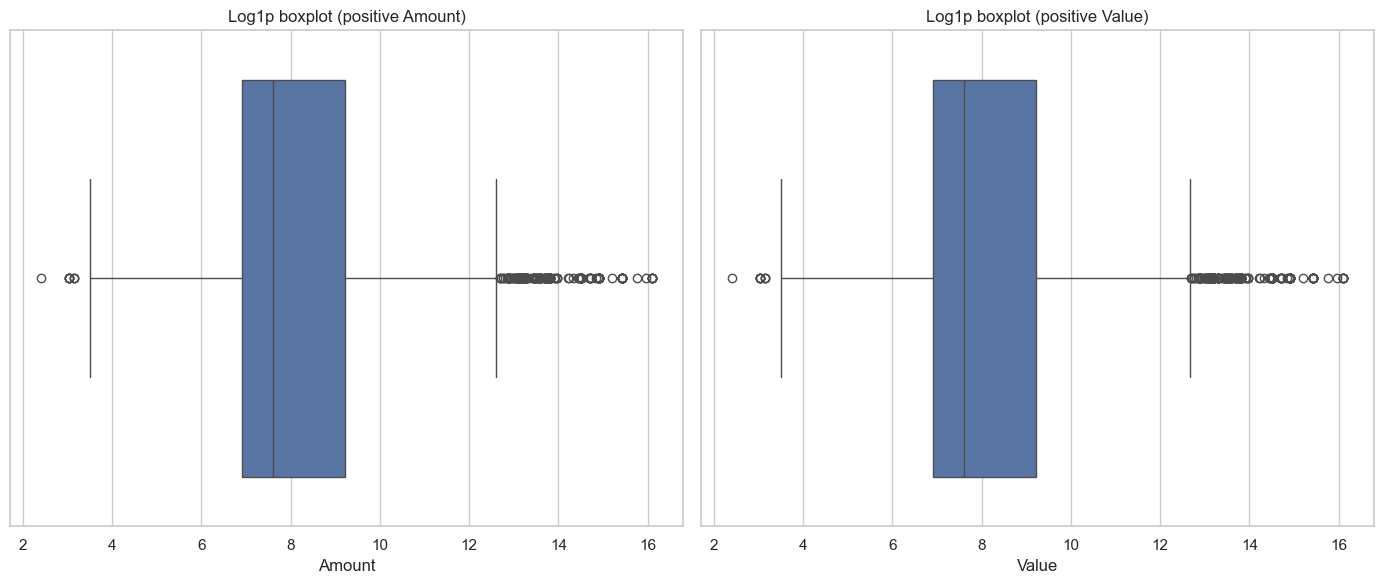

In [11]:
# Outlier detection via boxplots
features_for_outliers = ["Amount", "Value"]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, col in zip(axes, features_for_outliers):
    sns.boxplot(x=clean_df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Log-scale view on positive values to highlight tail behaviour
pos_df = clean_df[clean_df["Amount"] > 0]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, col in zip(axes, features_for_outliers):
    sns.boxplot(x=np.log1p(pos_df[col]), ax=ax)
    ax.set_title(f"Log1p boxplot (positive {col})")
plt.tight_layout()
plt.show()



In [12]:
# Automated insight highlights
from IPython.display import Markdown, display

row_count, col_count = clean_df.shape
neg_amount_pct = (clean_df["Amount"] < 0).mean() * 100
neg_value_pct = (clean_df["Value"] < 0).mean() * 100

product_top = clean_df["ProductCategory"].value_counts(normalize=True).head(1)
product_top_name = product_top.index[0]
product_top_pct = (product_top.iloc[0] * 100).round(2)

amount_value_corr = corr_matrix.loc["Amount", "Value"] if "Amount" in corr_matrix and "Value" in corr_matrix else np.nan
fraud_rate = clean_df["FraudResult"].mean() * 100

missing_cols = missing_df[missing_df["missing_count"] > 0]
missing_summary = ", ".join(missing_cols.index.tolist()) if not missing_cols.empty else "None"

insights = f"""
- Dataset shape: {row_count} rows x {col_count} columns.
- Negative transactions: {neg_amount_pct:.2f}% of Amount and {neg_value_pct:.2f}% of Value entries are negative, suggesting reversals/refunds.
- Dominant product category: {product_top_name} (~{product_top_pct}%).
- Amount vs Value correlation: {amount_value_corr:.3f} (high indicates close alignment between billed and valued amounts).
- Fraud prevalence (mean of FraudResult): {fraud_rate:.2f}%.
- Columns with missing values: {missing_summary}.
"""

display(Markdown("## Key Insights"))
display(Markdown(insights))


## Key Insights


- Dataset shape: 95662 rows x 16 columns.
- Negative transactions: 39.92% of Amount and 0.00% of Value entries are negative, suggesting reversals/refunds.
- Dominant product category: financial_services (~47.46%).
- Amount vs Value correlation: 0.990 (high indicates close alignment between billed and valued amounts).
- Fraud prevalence (mean of FraudResult): 0.20%.
- Columns with missing values: None.
